### Feature Importance with substitution effects

Here is the translated text with appropriate LaTeX formatting for the formulas:

---

It is useful to classify **methods for estimating feature importance** based on whether they are affected by the **substitution effect**. In this context, a substitution effect occurs when the estimated feature importance decreases due to the presence of other **correlated features**. The **substitution effect** in machine learning is similar to **multicollinearity** in statistics or econometrics.

One way to address the **linear substitution effect** is to apply **PCA (Principal Component Analysis)** to the original features. After transforming them into **orthogonal components**, feature importance can then be analyzed based on these transformed features.

#### $p-\mathrm{value}$

Here’s the revised translation with LaTeX properly formatted formulas enclosed in `$$`:

---

The **classical regression analysis framework** makes several assumptions about the fitted model, such as correct model specification, uncorrelated regressors, or white noise residuals. Based on the assumption that these hold true, researchers have aimed to determine the importance of explanatory variables through **hypothesis testing**. A common method for expressing the importance and explanatory power of variables is the **p-value**, a concept proposed in the 1700s.

$$ 
p\text{-value} = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0(1 - p_0)}{n}}} 
$$

The p-value quantifies the probability of obtaining a result as extreme as, or more extreme than, what we estimated under the assumption that the **true coefficient of the corresponding variable is 0**. It indicates how well the data conforms to the specified statistical model. However, the p-value does not measure the probability that the null or alternative hypothesis is true, nor the randomness of the data. Furthermore, **misuse of the p-value** is widespread and has caused reliability issues in financial research over recent decades.

The biggest drawback of the p-value is that its validity **relies heavily on strong assumptions**. If any of these assumptions are violated, **false positives or false negatives** are more likely to occur. For this reason, in 2019, the **American Statistical Association** advised against the use of the p-value as a measure of statistical significance (Wasserstein et al. 2019).

A second drawback of the p-value is that it **cannot be robustly estimated for variables with high multicollinearity**. When multicollinearity exists, traditional regression methods cannot distinguish between redundant information, leading to a **substitution effect** that inflates the p-value beyond its true value.

A third drawback is that the p-value evaluates **irrelevant probabilities**. Given a null hypothesis $H_0$ and an estimated coefficient $\hat{\beta}$, the p-value estimates the probability of obtaining a result as extreme as $\hat{\beta}$, assuming $H_0$ is true. 

$$ 
H_0 \quad \text{and} \quad \hat{\beta} 
$$

However, researchers are often more interested in the **reverse probability**: the probability that $H_0$ is true given the observed $\hat{\beta}$. This probability can be calculated using **Bayes' theorem**, but it requires assumptions about the **prior distribution**.

A fourth flaw of the p-value is that it **evaluates the significance of the sample**. The entire sample is used to solve two tasks: **estimating the coefficients and determining significance**. As a result, the p-value may be low for variables without any explanatory power outside the sample. Repeated **in-sample testing on the same dataset** increases the likelihood of false discoveries, which is **statistical malpractice**.

In summary, the p-value demands too many assumptions, making it unsuitable for models with many variables, and it is not an appropriate measure for estimating significance. The example below illustrates how the p-value can dilute information.

Here’s the translated version with clear formatting:

---

The following function generates **informative, redundant, and noise features**. Each feature has the following characteristics:

1. **Informative**: A feature that provides unique and independent information that is critical for predicting the label.
2. **Redundant**: A feature that contributes important information for predicting the label but exhibits **multicollinearity** with other features.
3. **Noise**: A feature that has **minimal or no impact** on label prediction.

In [1]:
import pandas as pd
import numpy as np
from quant_free.FinancialMachineLearning.generator.classification_data import get_test_data
from quant_free.dataset.us_equity_load import *
from quant_free.utils.us_equity_utils import *
from quant_free.factor.price import *

Here’s the translation:  

---

The total number of features is set to **20**. Among them:  
- **5 informative features**  
- **5 redundant features**  
- **10 noise features** (automatically determined)  

The number of **observations** is **1000**. These features will be generated accordingly.

In [74]:
trnsX, cont = get_test_data(
    n_features = 20, 
    n_informative = 5, 
    n_redundant = 5, 
    n_samples = 1000
)

symbol = 'AAPL'
start_date = "2021-10-06"
end_date = "2024-10-06"
periods = -5
# start_date = get_json_config_value("start_date")
# end_date = get_json_config_value("end_date")

factor = us_equity_data_load_within_range(symbols = [symbol], start_date = start_date,
                                  end_date = end_date, column_option = "all", file_name = 'Alpha101.csv')['AAPL']
factor = factor.replace({True: 1, False: 0})
factor = factor.loc[:, (factor != 0).any(axis=0)]
# trnsX = factor.loc[:, ['alpha1', 'alpha2', 'alpha3', 'alpha4', 'alpha5', 'alpha6', 'alpha7', 'alpha8', 'alpha9', 'alpha10', 'alpha11', 'alpha12', 'alpha13', 'alpha14', 'alpha15']]
trnsX = factor.filter(like='alpha').astype(np.float64)


price_ratio = PriceRatio(start_date, end_date, symbol = symbol, column_option = 'close', dir_option = 'xq')
y_data = price_ratio.price_ratio(periods = periods)
cont = pd.DataFrame(y_data.map(lambda x: 1 if x > 0 else 0 if x < 0 else 0))
cont = pd.concat([cont, y_data], axis = 1)
cont.columns = ['bin', 'price_ratio_1']



## Here’s the logistic regression model with the requested format:

The formula for the logit model is:

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k
$$

Where:
- $p$ is the probability of the outcome (e.g., the probability that the dependent variable equals 1).
- $\beta_0$ is the intercept (constant term).
- $\beta_1, \beta_2, \ldots, \beta_k$ are the coefficients for each predictor variable $X_1, X_2, \ldots, X_k$.

To find the probability $p$ from the logit, you can use the inverse logit function:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k)}}
$$

This represents the logistic function, which maps any real-valued number into the $(0, 1)$ interval, making it suitable for probability estimation.

## calculate the p-value in the context of a logistic regression model, you typically follow these steps:

1. **Fit the Logistic Regression Model**: Use your data to fit the model, which estimates the coefficients ($\beta$) for each predictor variable.

2. **Calculate the Test Statistic**: For each coefficient, you calculate the test statistic, which is usually the ratio of the estimated coefficient to its standard error:

   $$
   z = \frac{\hat{\beta}}{SE(\hat{\beta})}
   $$

   Where:
   - $\hat{\beta}$ is the estimated coefficient.
   - $SE(\hat{\beta})$ is the standard error of the estimated coefficient.

3. **Determine the p-value**: The p-value is derived from the test statistic. In the case of logistic regression, the test statistic follows a standard normal distribution (Z-distribution) under the null hypothesis (that the coefficient is equal to zero).

   You can calculate the p-value as follows:

   - For a two-tailed test:

   $$
   p\text{-value} = 2 \cdot (1 - \Phi(|z|))
   $$

   Where $\Phi$ is the cumulative distribution function (CDF) of the standard normal distribution.

4. **Interpret the p-value**: A low p-value (typically < 0.05) indicates that you can reject the null hypothesis, suggesting that the predictor variable is significantly associated with the response variable.

In Python, using the `statsmodels` library, you can easily obtain p-values after fitting a logistic regression model. For example:

```python
import statsmodels.api as sm

# Fit the model
model = sm.Logit(y, X).fit()

# Display the summary, which includes p-values
print(model.summary())
```

The output will include the p-values for each predictor variable in the model.

In [75]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

ols = sm.Logit(cont['bin'], trnsX).fit()

Optimization terminated successfully.
         Current function value: 0.522427
         Iterations 20


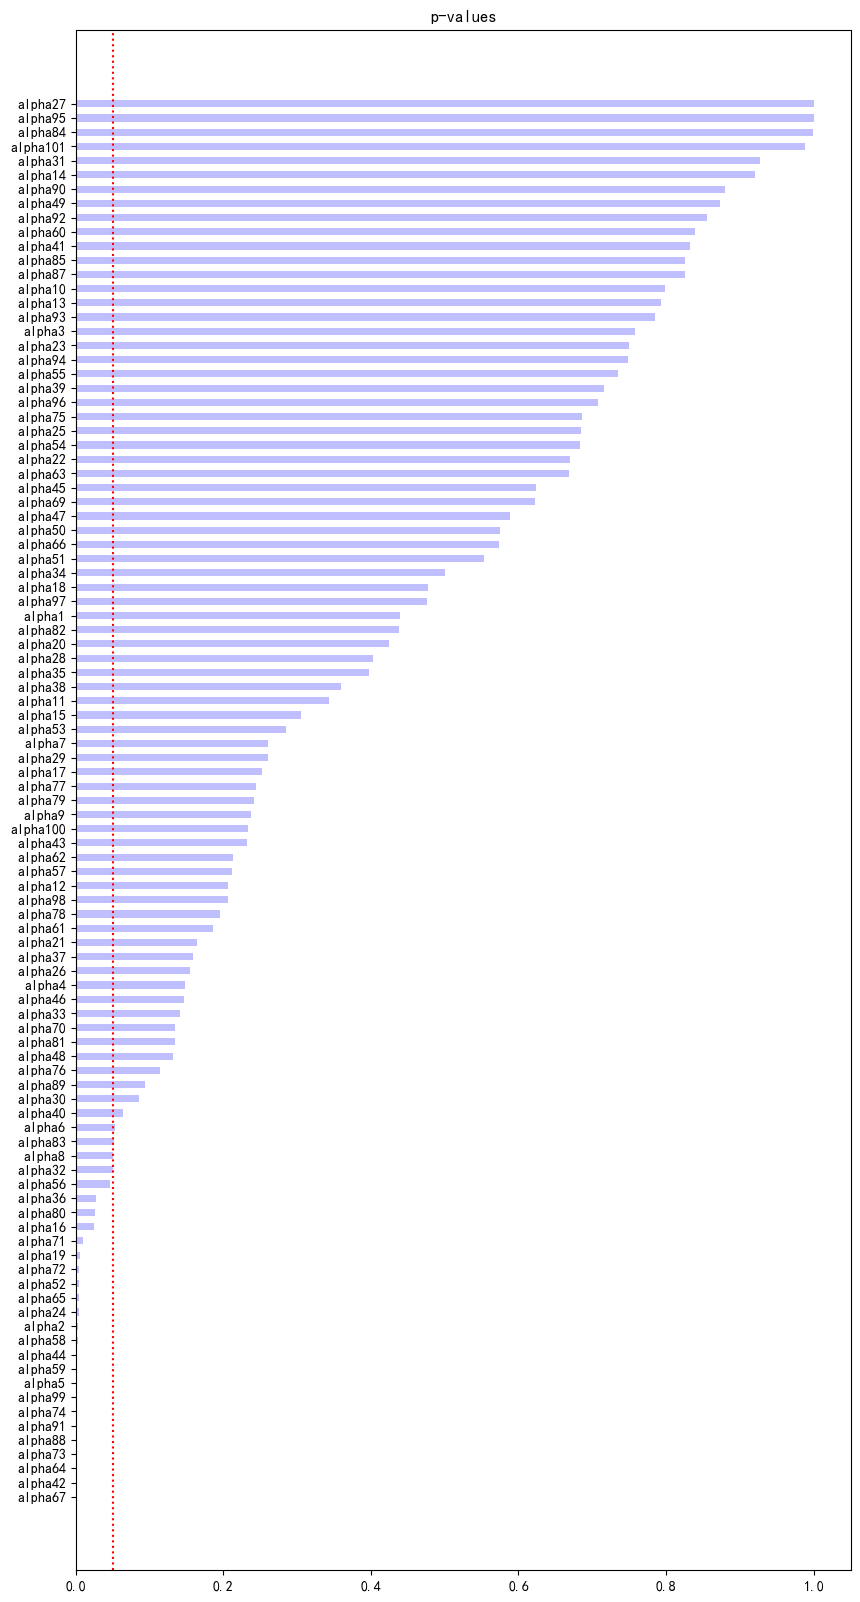

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 20))
plt.barh(
    ols.pvalues.sort_values(ascending = True).index, 
    ols.pvalues.sort_values(ascending = True), 
    color = 'b', alpha = 0.25, height = 0.5
)
plt.axvline(0.05, ls = ':', color = 'r')
plt.grid(False)
plt.title('p-values')
plt.show()

Here’s the translation:  

---

Unfortunately, financial datasets often exhibit **high multicollinearity** due to common risk factors shared across various aspects of the investment environment, such as **market, sector, rating, value, momentum, quality of earnings, and time horizon**.  

In such situations, financial researchers should refrain from **relying solely on p-values**. It is essential for them to be familiar with **additional methods** to determine which variables contain relevant information regarding specific phenomena.

#### Mean Decrease Importance

Here is the revised version with LaTeX formulas properly formatted using **$** symbols:

---

Let’s assume we have **N training samples**, each consisting of **F features** and one label per observation. Classification or regression algorithms based on **tree models** split the label at each node \(t\) into two samples. For a given feature \(X_f\), the labels in node \(t\) with values less than or equal to a chosen threshold \(\tau\) are placed in the **left sample**, while the rest are placed in the **right sample**. This process is called a **split**, and most ensemble models like **Random Forest**, **XGBoost**, and **CatBoost** follow this splitting mechanism.

The impurity of a label’s distribution for each sample can be evaluated using **entropy**, **Gini impurity**, or other criteria. Intuitively, the sample is considered the purest when it contains only one type of label, while impurity is at its highest when labels are distributed uniformly. The **information gain** from a split is measured by the reduction in impurity:

\[
$\Delta g(t, f) = i(t) - \frac{N_t^{(0)}}{N_t}i(t^{(0)}) - \frac{N_t^{(1)}}{N_t}i(t^{(1)})$
\]

Where:  
- $i(t)$ is the impurity of the labels at node $t$,  
- $i(t^{(0)})$ is the impurity of the left sample,  
- $i(t^{(1)})$ is the impurity of the right sample.

At each node $t$, the classification model evaluates $\Delta g(t, f)$ for the various features $\{X_f\}_{1, \dots, F}$ and determines the **optimal threshold** that maximizes $\Delta g(t, f)$. The feature associated with the highest $\Delta g(t, f)$ is selected for splitting. The algorithm continues to split samples until no further information gain occurs or some **early stopping condition** (such as a minimum impurity threshold) is satisfied.

---

### **Feature Importance and Mean Decrease Impurity (MDI)**

Feature importance can be calculated for all selected nodes using **Weighted Information Gain**. **MDI (Mean Decrease Impurity)** indicates how much each feature contributes to reducing impurity, and the sum of all feature importances is 1. If there are $F$ features with equal information, the expected importance of each feature would be $\frac{1}{F}$.

---

### **Considerations when using MDI**:

1. **Masking Effect**:  
   If the tree-based classifier systematically prefers certain features over others, some features may be **masked**. To overcome this, set `max_features = 1` when using `RandomForestClassifier` in `sklearn`. This ensures that only **one random feature** is considered at each level:
   - This gives each feature a chance to reduce impurity.
   - Features with 0 importance should not be included in the average calculation, as they were not selected purely by chance. These values should be replaced with `numpy.nan` or similar.

2. **In-Sample Process**:  
   The procedure is inherently **in-sample**, meaning that even features without predictive power may still have some importance.

3. **Non-Generality**:  
   MDI cannot be generalized to **non-tree-based classifiers**.

4. **Sum to One**:  
   By design, MDI ensures that the sum of all feature importances equals 1, and each feature’s importance lies between 0 and 1.

5. **Substitution Effect**:  
   MDI does not address **substitution effects** when correlated features are present. It dilutes the importance of interchangeable features because of their redundancy. As a result, the importance of two identical features is halved, as either one could be chosen with equal probability.

6. **Bias toward High Cardinality**:  
   Strobl et al. (2007) demonstrated experimentally that MDI can be biased towards certain predictors. White & Liu (1994) argued that for a single decision tree, this bias favored predictors with many categories, as impurity functions tended to work unfairly in their favor.

---

### **MDI Estimation in sklearn’s Ensemble Models**:

`sklearn` provides a built-in method for estimating MDI feature importance in ensemble models like Random Forest, as shown below:

```python
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
```

The **importance estimates** correspond to the **beta coefficients** in econometric models, while **standard deviation** serves a similar role to estimating a **t-distribution** for variables. Thus, feature importance can function as a parameter.

---

### **Time Series Models and Feature Importance**:

Since we are dealing with **time series models**, we should use feature importance that accounts for **temporal redundancy**.

In [5]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from quant_free.FinancialMachineLearning.feature_importance import *

forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 1,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = trnsX, y = cont['bin'])
oob_score = fit.oob_score_

In [6]:
from quant_free.FinancialMachineLearning.cross_validation.cross_validation import PurgedKFold, cross_val_score
cv_gen = PurgedKFold(
    n_splits = 5, 
    samples_info_sets = cont['t1']
)

KeyError: 't1'

In [7]:
oos_score = cross_val_score(
    forest, # base classifier
    trnsX, # train features
    cont['bin'], # train labels
    cv_gen = cv_gen, # purged k fold cross validation class
    scoring = accuracy_score # optimizing to accuracy score
).mean()

In [8]:
from quant_free.FinancialMachineLearning.feature_importance.importance import *
mdi = mean_decrease_impurity(fit, trnsX.columns)

In [9]:
mdi.head()

,mean,std
I_0,0.109207,0.003650
I_1,0.042993,0.000928
I_2,0.044925,0.001045
I_3,0.078004,0.002632
I_4,0.055393,0.001253


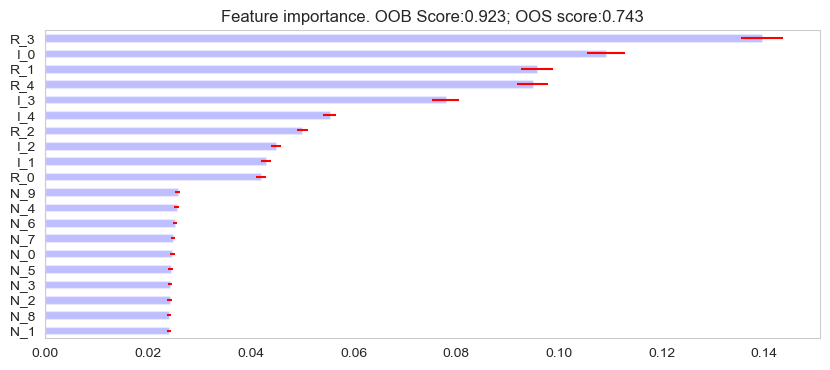

In [10]:
plot_feature_importance(
    mdi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

Here’s the translation:

---

When comparing the results of the p-value, it can be observed that all **noise features** are ranked lower. It is evident that features with relevant **information** and **redundant features** have high importance in model training.

**MDI feature importance** has the following advantages:

1. MDI does not require strong **distributional assumptions** about the variables for calculation. In other words, the distribution of the variables can take any form.
2. While the **beta** of a statistical model is estimated based on a single sample, MDI feature importance in an ensemble model is derived through **bootstrapping**. Therefore, the variance of the estimates can be reduced by increasing the number of ensemble estimators.
3. The goal of a classifier with a **tree-based model** is not to estimate the coefficients of a given algebraic equation, thus it is independent of estimating the probability of a specific null hypothesis. As a result, it identifies and scores features that are practically helpful in the estimator.

However, since MDI is calculated strictly within the sample, there is a possibility of **overfitting**. The **MDA feature importance** introduced later addresses this drawback.

#### Mean Decrease Accuracy

Here’s the translation:

---

Both **p-value** and **MDI** highlight the point that variables appearing significant within the sample may not necessarily be relevant for the prediction purpose. To address this issue, **MDA (Mean Decrease Accuracy) feature importance** has been proposed.

MDA operates as follows:

1. Fit the model and calculate cross-validated performance.
2. Use the same fitted model to calculate cross-validated performance, with the only difference being that the observations related to one of the features are shuffled. This provides one modified cross-validation performance score per feature.
3. By comparing the cross-validated performance before and after shuffling, the MDA score associated with the specific feature can be derived. **If the feature is important, then under independence, the shuffling should lead to a significant decrease in performance.**

An important attribute of MDA is that, like MDI, it is an average of multiple estimates rather than a single estimate. Generally, MDA feature importance is often referred to as **permutation importance**, and it can be implemented as follows:

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(
    model, X_val, y_val,
    n_repeats=30,
    random_state=0
)
```

Since we are dealing with time series data where the order of events is crucial, we will use the MDA feature importance from the example below rather than using permutation importance directly.

One important point is that if features are not independent, MDA may underestimate the importance of correlated features. In extreme cases, when considering two features that are both very important but similar, shuffling one feature may offset the effect due to the presence of the other feature, leading to the conclusion that both features are unimportant. Let’s examine the example below to confirm this.

In [11]:
forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 3,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = trnsX, y = cont['bin'])
oob_score = fit.oob_score_

In [12]:
mda = mean_decrease_accuracy(
    fit, # base classification model
    trnsX, # train features
    cont['bin'], # train labels
    cv_gen, # purged k fold cross validation class
    scoring = accuracy_score
)

5it [00:10,  2.12s/it]


In [13]:
mda.head()

,mean,std
I_0,0.132141,0.228427
I_1,0.104274,0.027225
I_2,0.111496,0.051622
I_3,0.142856,0.065140
I_4,0.133888,0.048109


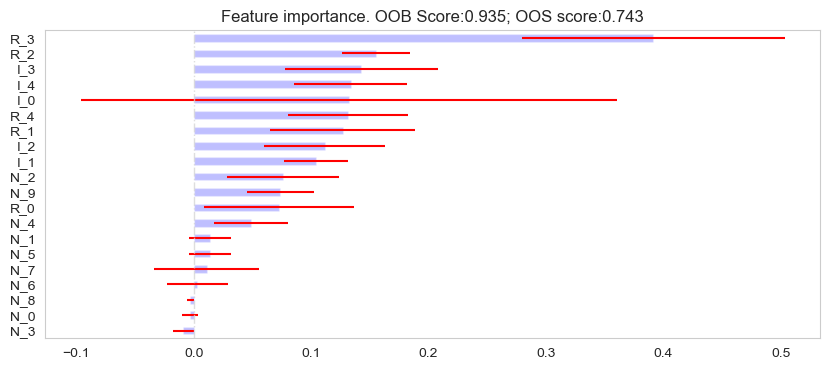

In [14]:
plot_feature_importance(
    mda,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/MDA_feature_importance.png'
)
plt.grid(False)
plt.show()

### Feature Importance without substitution effects

Here’s the translation:

---

The substitution effect can lead to the dismissal of overlapping important features. While this generally does not pose a problem for predictions, it can result in erroneous conclusions during the processes of model interpretation, improvement, and simplification. For this reason, the following **Single Feature Importance** techniques can serve as complementary methods to MDI and MDA.

#### Single Feature Importance

Here's the translation:

---

**Single Feature Importance** (SFI) is a cross-sectional predictive importance method. This approach calculates out-of-sample performance independently for each feature. Several considerations include:

1. This method can be applied not only to tree-based ensemble models but also to all classifiers.
2. SFI is not limited to accuracy as a performance metric.
3. Unlike MDI or MDA, the substitution effect does not occur. The reason is that only one feature is considered at a time.
4. Similar to MDA, it is possible to conclude that not all features are important, as performance is evaluated through out-of-sample cross-validation.

A major limitation of SFI is that a classifier with two features may perform better than two separate classifiers with a single feature each. For example, feature B may only be useful when combined with feature A, or it may not be accurate on its own but could effectively explain splits derived from feature A. In other words, the combined effect or hierarchical importance disappears in SFI.

One alternative is to compute out-of-sample performance from subsets of features, but it becomes challenging as the number of features to consider increases. Below is a code snippet showing one implementation of the SFI technique.

In [15]:
sfi = single_feature_importance(
    fit, # base classification model
    trnsX, # train features
    cont['bin'], # train labels
    cv_gen, # purged k fold cross validation class
    scoring = accuracy_score
)

100%|██████████| 20/20 [02:10<00:00,  6.55s/it]


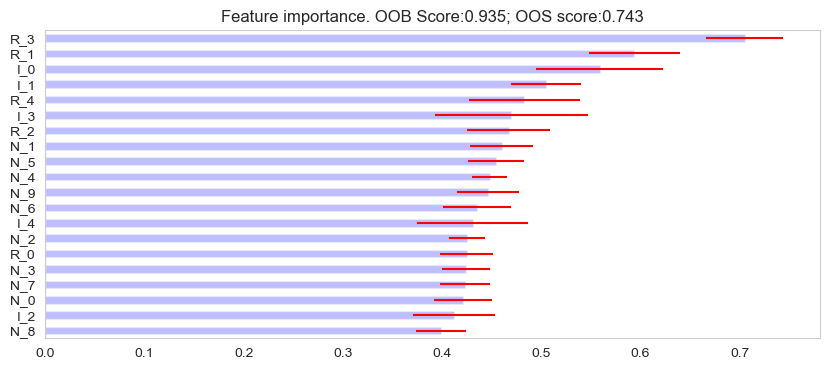

In [16]:
plot_feature_importance(
    sfi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/SFI_feature_importance.png'
)
plt.grid(False)
plt.show()

#### Orthogonal Importance

Here's the translation:

---

The substitution effect dilutes feature importance specified by MDI and significantly underestimates feature importance measured by MDA. A partial solution is to orthogonalize the features before applying MDI or MDA. Orthogonalization procedures, such as PCA, may not eliminate all substitution effects, but they can at least mitigate the influence of linear substitution effects.

In [37]:
from quant_free.FinancialMachineLearning.feature_importance.orthogonal import get_orthogonal_features, get_pca_rank_weighted_kendall_tau

ortho_features = get_orthogonal_features(trnsX, variance_thresh = 0.95)
ortho_features = pd.DataFrame(ortho_features, index = trnsX.index)

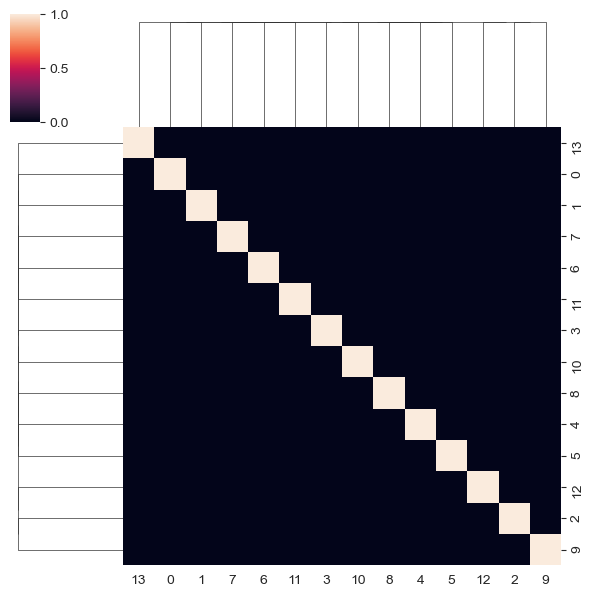

In [28]:
import seaborn as sns
sns.clustermap(pd.DataFrame(ortho_features).corr(), figsize = (6, 6))
plt.show()

In [32]:
forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 1,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = ortho_features, y = cont['bin'])

In [38]:
cv_gen = PurgedKFold(
    n_splits = 5, 
    samples_info_sets = cont['t1']
)

In [39]:
oos_score = cross_val_score(
    forest, # base classifier
    ortho_features, # train features
    cont['bin'], # train labels
    cv_gen = cv_gen, # purged k fold cross validation class
    scoring = accuracy_score # optimizing to accuracy score
).mean()

In [42]:
ortho_mdi = mean_decrease_impurity(
    fit, # base classification model
    ortho_features.columns,
)

In [47]:
ortho_mdi.head()

,mean,std
0,0.123077,0.001958
1,0.232417,0.003438
2,0.091112,0.001231
3,0.051225,0.000672
4,0.049399,0.000647


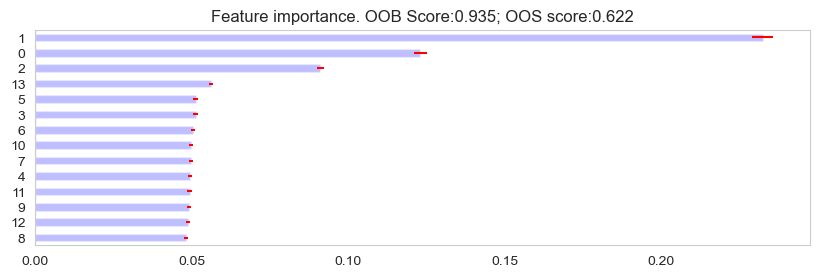

In [48]:
plot_feature_importance(
    ortho_mdi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/Ortho_MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

In [49]:
from quant_free.FinancialMachineLearning.feature_importance.orthogonal import feature_pca_analysis

pca_mdi = feature_pca_analysis(
    ortho_features, 
    feature_importance = ortho_mdi,
    variance_thresh = 0.95
)

In [50]:
pca_mdi

{'Pearson': PearsonRResult(statistic=0.05265772290001818, pvalue=0.46355755972757967),
 'Spearman': SignificanceResult(statistic=0.1380204078609633, pvalue=0.053709865837689594),
 'Kendall': SignificanceResult(statistic=0.09772182062086067, pvalue=0.04880014677509788),
 'Weighted_Kendall_Rank': SignificanceResult(statistic=0.30025828278416544, pvalue=nan)}

In [51]:
forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 3,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = ortho_features, y = cont['bin'])

In [52]:
oos_score = cross_val_score(
    forest, # base classifier
    ortho_features, # train features
    cont['bin'], # train labels
    cv_gen = cv_gen, # purged k fold cross validation class
    scoring = accuracy_score # optimizing to accuracy score
).mean()

In [53]:
ortho_mda = mean_decrease_impurity(
    fit, # base classification model
    ortho_features.columns,
)

In [54]:
ortho_mda.head()

,mean,std
0,0.163280,0.001933
1,0.342852,0.002619
2,0.118603,0.001204
3,0.034821,0.000585
4,0.029213,0.000544


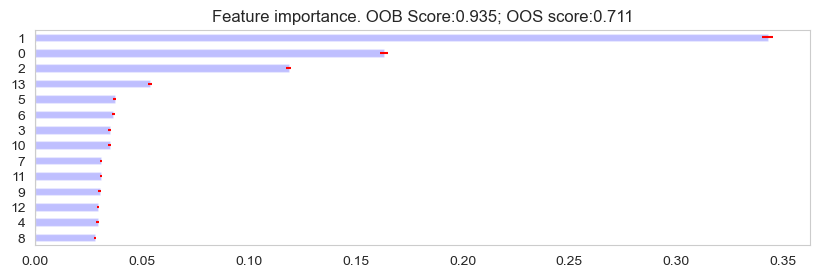

In [55]:
plot_feature_importance(
    ortho_mda,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/Ortho_MDA_feature_importance.png'
)
plt.grid(False)
plt.show()

In [56]:
forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 1,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = ortho_features, y = cont['bin'])

In [58]:
ortho_sfi = single_feature_importance(
    fit, # base classification model
    ortho_features, # train features
    cont['bin'], # train labels
    cv_gen, # purged k fold cross validation class
    scoring = accuracy_score
)

100%|██████████| 14/14 [01:31<00:00,  6.56s/it]


In [59]:
ortho_sfi.head()

,mean,std
0,0.466,0.033178
1,0.627,0.046143
2,0.483,0.071114
3,0.443,0.023858
4,0.437,0.031324


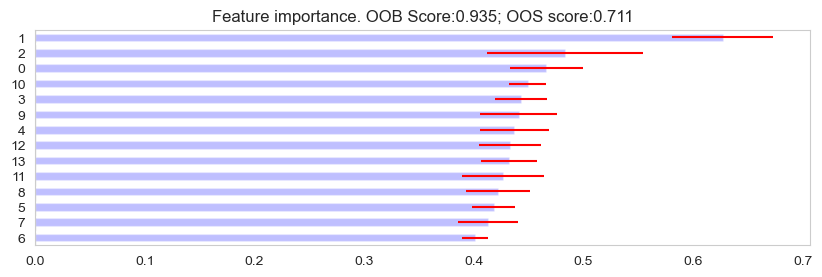

In [60]:
plot_feature_importance(
    ortho_sfi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './images/Ortho_SFI_feature_importance.png'
)
plt.grid(False)
plt.show()